 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картиной. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [ ]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor 

Скачаем обучающую и контрольную выборки.

In [ ]:
transform = transforms.Compose([ToTensor(),
                                transforms.Normalize((0.485,), (0.229,)),
                                ])

In [ ]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=512,
                                          shuffle=True,)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=512,
                                         shuffle=False,)



  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
classes = {idx:name for idx,name in enumerate(trainloader.dataset.classes)}
classes

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

<h2 style="text-align: center;"><b>Задание</b></h2>

Посмотрите на датасет.
* Сколько картинок в train? В test?
* Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?
* Выведите несколько картинок с помощью `pyplot`

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

In [ ]:
print(f"В train {len(trainset)} картинок\nВ test {len(testset)} картинок")

В train 60000 картинок
В test 10000 картинок


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


<BarContainer object of 10 artists>

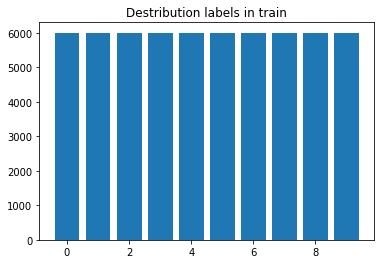

In [ ]:
plt.title("Destribution labels in train")
plt.bar(*trainset.train_labels.unique(return_counts=True))

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


Равномерно ))


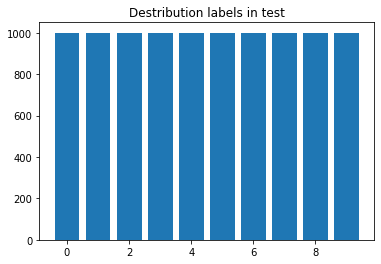

In [ ]:
plt.title("Destribution labels in test")
plt.bar(*testset.train_labels.unique(return_counts=True))
print("Равномерно ))")

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


<Figure size 1008x1080 with 0 Axes>

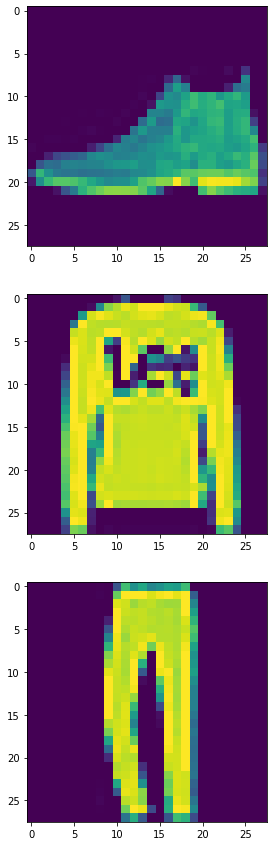

In [ ]:
plt.figure(figsize=(14, 15))
n_imges = 3
f, axarr = plt.subplots(n_imges,1)
for idx in range(n_imges):
  axarr[idx].imshow(testset.test_data[idx])
f.set_size_inches(14,15)

In [ ]:
import torch.nn as nn

In [ ]:
shape_image = trainset.train_data[0].reshape(-1).shape[0]
shape_image

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


784

In [ ]:
dense_model = nn.Sequential(
    nn.Linear(shape_image,shape_image//2),
    nn.BatchNorm1d(shape_image//2),
    nn.ELU(),
    nn.Linear(shape_image//2,shape_image//4),
    nn.BatchNorm1d(shape_image//4),
    nn.ELU(),
    nn.Linear(shape_image//4,shape_image//8),
    nn.ELU(),
    nn.Linear(shape_image//8,len(classes)),
    nn.Softmax(),
)

In [ ]:
dense_model

Sequential(
  (0): Linear(in_features=784, out_features=392, bias=True)
  (1): BatchNorm1d(392, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ELU(alpha=1.0)
  (3): Linear(in_features=392, out_features=196, bias=True)
  (4): BatchNorm1d(196, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ELU(alpha=1.0)
  (6): Linear(in_features=196, out_features=98, bias=True)
  (7): ELU(alpha=1.0)
  (8): Linear(in_features=98, out_features=10, bias=True)
  (9): Softmax(dim=None)
)

In [ ]:
from torch.optim import Adam
from tqdm import tqdm

In [ ]:
loss = nn.CrossEntropyLoss()
model = dense_model.cuda()
optim = Adam(model.parameters(),lr = 1e-03,weight_decay = 1e-05)

In [ ]:
model.train()
epochs = 20
loss_array = []
Acc_array = []
for epoch in range(epochs):
  loss_values = 0
  for idx,(b_image, b_label) in tqdm(enumerate(trainloader)):
    b_image_gpu = b_image.reshape(b_image.shape[0],-1).cuda()
    b_label_gpu = b_label.cuda()
    
    predicts = model(b_image_gpu)
  
    loss_value = loss(predicts,b_label_gpu)
    if idx == 0:
      preds = torch.max(predicts, dim = 1)[1].cpu()
      gt = b_label.cpu()
    else:
        preds = torch.cat((preds,torch.max(predicts.cpu(), dim = 1)[1]))
        gt = torch.cat((gt, b_label.cpu()),dim = 0)

    optim.zero_grad()
    loss_value.backward()
    optim.step()
    loss_values+=loss_value
  loss_array.append(loss_values)
  assert preds.shape == gt.shape
  print(f"Epoch {epoch}")
  acc = torch.sum(preds.reshape(-1)==gt.reshape(-1))/(gt.shape[0])
  Acc_array.append(acc)
  print(f"Accuracy {Acc_array[-1]}")
  print(f"Loss {loss_values/idx+1}")

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
118it [00:15,  7.78it/s]


Epoch 0
Accuracy 0.7852500081062317
Loss 2.7174696922302246


118it [00:14,  8.01it/s]


Epoch 1
Accuracy 0.8500999808311462
Loss 2.6294422149658203


118it [00:14,  8.18it/s]


Epoch 2
Accuracy 0.8650166392326355
Loss 2.6125881671905518


118it [00:14,  8.13it/s]


Epoch 3
Accuracy 0.8702999949455261
Loss 2.606372117996216


118it [00:14,  8.24it/s]


Epoch 4
Accuracy 0.8774499893188477
Loss 2.5994739532470703


118it [00:14,  7.92it/s]


Epoch 5
Accuracy 0.8809333443641663
Loss 2.5956125259399414


118it [00:14,  7.96it/s]


Epoch 6
Accuracy 0.8830833435058594
Loss 2.5924720764160156


118it [00:14,  8.01it/s]


Epoch 7
Accuracy 0.8884833455085754
Loss 2.587001323699951


118it [00:14,  7.92it/s]


Epoch 8
Accuracy 0.8898333311080933
Loss 2.5864980220794678


118it [00:14,  8.05it/s]


Epoch 9
Accuracy 0.8917499780654907
Loss 2.583697557449341


118it [00:14,  8.09it/s]


Epoch 10
Accuracy 0.8958500027656555
Loss 2.580299139022827


118it [00:14,  8.07it/s]


Epoch 11
Accuracy 0.8936833143234253
Loss 2.581404685974121


118it [00:14,  7.99it/s]


Epoch 12
Accuracy 0.8978666663169861
Loss 2.5773613452911377


118it [00:14,  8.21it/s]


Epoch 13
Accuracy 0.8976333141326904
Loss 2.5777976512908936


118it [00:14,  8.21it/s]


Epoch 14
Accuracy 0.8987666964530945
Loss 2.5763351917266846


118it [00:15,  7.72it/s]


Epoch 15
Accuracy 0.9023500084877014
Loss 2.5726518630981445


118it [00:14,  8.06it/s]


Epoch 16
Accuracy 0.9033166766166687
Loss 2.5717787742614746


118it [00:14,  8.27it/s]


Epoch 17
Accuracy 0.9043333530426025
Loss 2.5704526901245117


118it [00:14,  8.08it/s]


Epoch 18
Accuracy 0.9053999781608582
Loss 2.5695114135742188


118it [00:14,  8.21it/s]

Epoch 19
Accuracy 0.9061166644096375
Loss 2.569180965423584


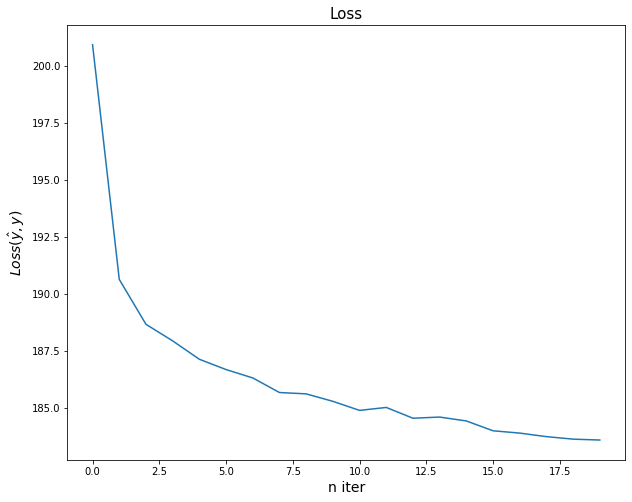

CPU times: user 366 ms, sys: 10 ms, total: 376 ms
Wall time: 391 ms


In [ ]:
%%time
plt.figure(figsize=(10, 8))
plt.plot(loss_array)
plt.title('Loss', fontsize=15)
plt.xlabel('n iter', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

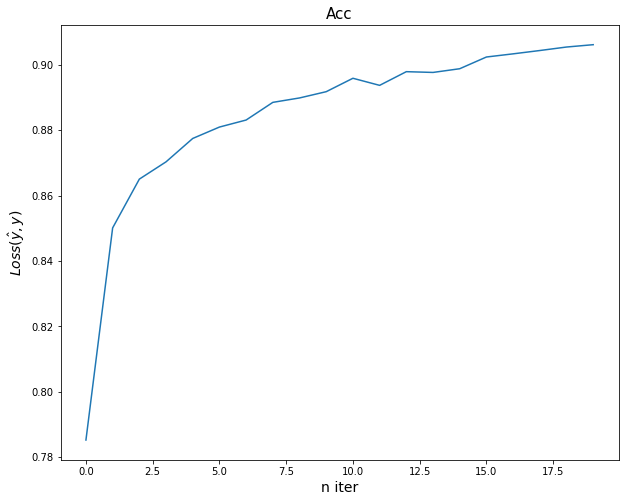

CPU times: user 225 ms, sys: 5.02 ms, total: 231 ms
Wall time: 229 ms


In [ ]:
%%time
plt.figure(figsize=(10, 8))
plt.plot(Acc_array)
plt.title('Acc', fontsize=15)
plt.xlabel('n iter', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

In [ ]:
model.eval()
loss_values = 0
with torch.no_grad():
  for idx,(b_image, b_label) in tqdm(enumerate(testloader)):
    b_image_gpu = b_image.reshape(b_image.shape[0],-1).cuda()
    b_label_gpu = b_label.cuda()

    predicts = model(b_image_gpu)

    loss_value = loss(predicts,b_label_gpu)
    if idx == 0:
      preds = torch.max(predicts, dim = 1)[1].cpu()
      gt = b_label.cpu()
    else:
        preds = torch.cat((preds,torch.max(predicts.cpu(), dim = 1)[1]))
        gt = torch.cat((gt, b_label.cpu()),dim = 0)
    loss_values+=loss_value
  print(f"Accuracy {torch.sum(preds.reshape(-1)==gt.reshape(-1))/(gt.shape[0])}")
  print(f"Loss {loss_values/(idx+1)}")

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
20it [00:02,  8.71it/s]

Accuracy 0.8605999946594238
Loss 1.5994194746017456


In [ ]:
class ConvModel(nn.Module):
  def __init__(self,):
    super(ConvModel, self).__init__()
    self. body = nn.Sequential(
      nn.Conv2d(1, 32,kernel_size = (3,3),stride=(1,1),padding = (1,1)),
      nn.ELU(),
      nn.BatchNorm2d(32),
      nn.MaxPool2d(kernel_size=(2,2),stride=(2,2),padding=(0,0)),

      nn.Conv2d(32, 64,kernel_size = (3,3),stride=(1,1),padding = (1,1)),
      nn.ELU(),
      nn.BatchNorm2d(64),
      nn.MaxPool2d(kernel_size=(2,2),stride=(2,2),padding=(0,0)),

      nn.Conv2d(64, 128,kernel_size = (3,3),stride=(1,1),padding = (1,1)),
      nn.ELU(),
      nn.BatchNorm2d(128),
      nn.MaxPool2d(kernel_size=(2,2),stride=(2,2),padding=(0,0)),

      nn.AdaptiveAvgPool2d(output_size=(2,2)),
    )
    self.last_layer = nn.Sequential(
        nn.Linear(512,128),
        nn.ELU(),
        nn.BatchNorm1d(128),
        nn.Linear(128,len(classes)),
        nn.Softmax(),
                                   )
  def forward(self,x):
    out = self.body(x)
    out = out.reshape(out.shape[0],-1)
    return self.last_layer(out)

In [ ]:
conv_model = ConvModel()
loss = nn.CrossEntropyLoss()
conv_model = conv_model.cuda()
optim = Adam(conv_model.parameters(),lr = 1e-03, weight_decay=5e-05)

conv_model.train()
epochs = 20
loss_array = []
Acc_array = []
for epoch in range(epochs):
  loss_values = 0
  for idx,(b_image, b_label) in tqdm(enumerate(trainloader)):
    b_image_gpu = b_image.cuda()
    b_label_gpu = b_label.cuda()
    
    predicts = conv_model(b_image_gpu)

    loss_value = loss(predicts,b_label_gpu)

    if idx == 0:
      preds = torch.max(predicts, dim = 1)[1].cpu()
      gt = b_label.cpu()
    else:
        preds = torch.cat((preds,torch.max(predicts.cpu(), dim = 1)[1]))
        gt = torch.cat((gt, b_label.cpu()),dim = 0)

    optim.zero_grad()
    loss_value.backward()
    optim.step()
    loss_values+=loss_value
  loss_array.append(loss_values)
  print(f"Epoch {epoch}")
  assert preds.shape == gt.shape
  acc = torch.sum(preds.reshape(-1)==gt.reshape(-1))/(gt.shape[0])
  Acc_array.append(acc)
  print(f"Accuracy {Acc_array[-1]}")
  print(f"Loss {loss_values/idx+1}")

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
118it [00:17,  6.72it/s]


Epoch 0
Accuracy 0.8252999782562256
Loss 2.676623821258545


118it [00:17,  6.65it/s]


Epoch 1
Accuracy 0.8904833197593689
Loss 2.5928268432617188


118it [00:17,  6.60it/s]


Epoch 2
Accuracy 0.9059000015258789
Loss 2.5749435424804688


118it [00:17,  6.59it/s]


Epoch 3
Accuracy 0.9157833456993103
Loss 2.5632762908935547


118it [00:17,  6.65it/s]


Epoch 4
Accuracy 0.9259166717529297
Loss 2.5525083541870117


118it [00:17,  6.85it/s]


Epoch 5
Accuracy 0.9323499798774719
Loss 2.5461013317108154


118it [00:18,  6.55it/s]


Epoch 6
Accuracy 0.9355833530426025
Loss 2.5419955253601074


118it [00:17,  6.80it/s]


Epoch 7
Accuracy 0.939216673374176
Loss 2.5383400917053223


118it [00:17,  6.58it/s]


Epoch 8
Accuracy 0.944516658782959
Loss 2.5328872203826904


118it [00:18,  6.53it/s]


Epoch 9
Accuracy 0.9486166834831238
Loss 2.5287394523620605


118it [00:17,  6.59it/s]


Epoch 10
Accuracy 0.951116681098938
Loss 2.525872230529785


118it [00:18,  6.56it/s]


Epoch 11
Accuracy 0.9544833302497864
Loss 2.522447347640991


118it [00:17,  6.74it/s]


Epoch 12
Accuracy 0.9575666785240173
Loss 2.5191800594329834


118it [00:17,  6.72it/s]


Epoch 13
Accuracy 0.9596499800682068
Loss 2.5169084072113037


118it [00:17,  6.59it/s]


Epoch 14
Accuracy 0.9622666835784912
Loss 2.514545202255249


118it [00:17,  6.76it/s]


Epoch 15
Accuracy 0.9624666571617126
Loss 2.514129161834717


118it [00:17,  6.83it/s]


Epoch 16
Accuracy 0.9630166888237
Loss 2.5131826400756836


118it [00:17,  6.73it/s]


Epoch 17
Accuracy 0.9656500220298767
Loss 2.5103812217712402


118it [00:17,  6.68it/s]


Epoch 18
Accuracy 0.9682499766349792
Loss 2.507844924926758


118it [00:17,  6.80it/s]

Epoch 19
Accuracy 0.9687333106994629
Loss 2.5069618225097656


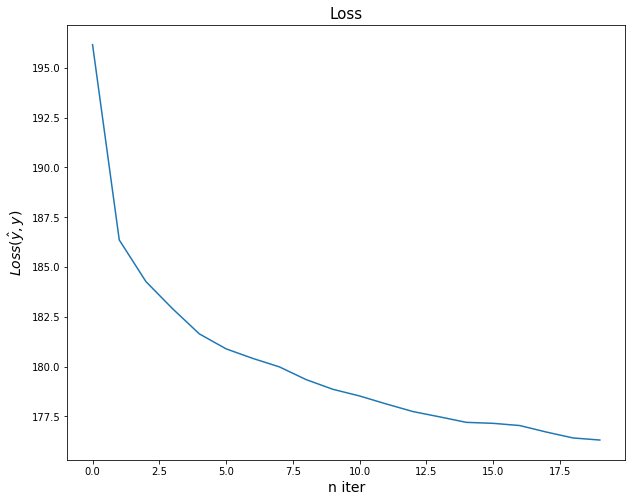

CPU times: user 243 ms, sys: 13.1 ms, total: 256 ms
Wall time: 253 ms


In [ ]:
%%time
plt.figure(figsize=(10, 8))
plt.plot(loss_array)
plt.title('Loss', fontsize=15)
plt.xlabel('n iter', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

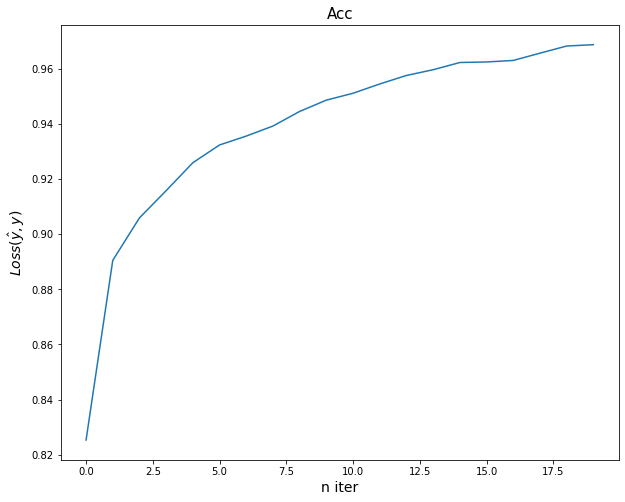

CPU times: user 229 ms, sys: 7.03 ms, total: 236 ms
Wall time: 234 ms


In [ ]:
%%time
plt.figure(figsize=(10, 8))
plt.plot(Acc_array)
plt.title('Acc', fontsize=15)
plt.xlabel('n iter', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

In [ ]:
conv_model.eval()
loss_values = 0
with torch.no_grad():
  for idx,(b_image, b_label) in tqdm(enumerate(testloader)):
    b_image_gpu = b_image.cuda()
    b_label_gpu = b_label.cuda()

    predicts = conv_model(b_image_gpu)

    loss_value = loss(predicts,b_label_gpu)
    if idx == 0:
      preds = torch.max(predicts, dim = 1)[1].cpu()
      gt = b_label.cpu()
    else:
        preds = torch.cat((preds,torch.max(predicts.cpu(), dim = 1)[1]))
        gt = torch.cat((gt, b_label.cpu()),dim = 0)
    loss_values+=loss_value
  print(f"Accuracy {torch.sum(preds.reshape(-1)==gt.reshape(-1))/(gt.shape[0])}")
  print(f"Loss {loss_values/(idx+1)}")

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
20it [00:02,  7.27it/s]

Accuracy 0.9120000004768372
Loss 1.5510629415512085
